<a href="https://colab.research.google.com/github/Navneet2409/bike-sharing-demand-prediction/blob/main/Bike_Sharing_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


## **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


To improve mobility comfort, many urban cities are now offering rental bikes. Because it shortens the time people have to wait, the public must have access to the rental bike at the right time. At some point, ensuring that the city has a consistent supply of rental bikes becomes a major concern. The significant part is the expectation of bicycle count expected at every hour for the steady stockpile of rental bicycles.

Bike sharing systems are a way to rent bikes where a network of locations automates the membership, rental, and bike return processes throughout a city. People can rent bikes from one location and return them to another or the same location as needed through these Bike Sharing systems. Individuals can lease a bicycle through memebership or on request premise. A citywide network of automated stores oversees this procedure.

Based on historical usage patterns in relation to weather, time, and other data, we are forecasting bike sharing demand prediction for the Bike Sharing Program in Seoul in this dataset.

## **Motivation** : -  

One of the most important business issues is predicting how many bikes will be needed on any given day and time of the day. Having fewer bikes results in revenue loss—ranging from a short-term loss due to missing out on immediate customers to a potential longer-term loss due to loss of future customer base while having more bikes results in resource waste (both in terms of bike maintenance and the land/bike stand required for parking and security). Therefore, having an estimate of the demands would enable these businesses to function effectively.

## ***Let's Begin !***

## ***1. Know Your Data***

#### Import Libraries

In [ ]:
# Import Libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

#### Dataset Loading

In [ ]:
#let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the seol bike data set from drive
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Bike Sharing Demand Prediction - Navneet Keshri/SeoulBikeData.csv',encoding ='latin')


#### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimps of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns 
bike_df.shape

(8760, 14)

#### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We have 14 columns. most of them are numerical except Seasons, Holiday, Functioning Day and Date

We have to convert Date column into DateTime datatype.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(bike_df[bike_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


From the above command, we notice that every column has 0 number of rows null values. This seems to be a very clean set of data and there are no missing data in any of the 'row x columns'.

#### What did you know about your dataset?

The dataset given is a dataset from Bike sharing service market, and we have to predict the demand for the bike sharing.

Demand prediction is analytical studies on the possibility of a customer seeking for bike sharing. The goal is to understand and take steps to manage demand and supply equilibrium at any time of the day.

The above dataset has 8760 rows and 14 columns. There are no mising values and duplicate values in the dataset. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


Checking for Categorical columns and different sub-category in it

In [ ]:
bike_df['Seasons'].value_counts()    # 4 sub category in Seasons which are spring, summer, autumn, winter

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
bike_df['Holiday'].value_counts()      # holiday and no holiday

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
bike_df['Functioning Day'].value_counts()    # yes or no sub-category

Yes    8465
No      295
Name: Functioning Day, dtype: int64

####Changing column names of complex columns

In [ ]:
#Renaming complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

## ***3. Variables Description***

The dataset contains weather information (Temperature, Humidity, Windspeed, 
Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

#### Checking Unique Values for each variable.

In [ ]:
#print the unique value
bike_df.nunique()

date                      365
rented_bike_count        2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radiation           345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functioning_day             2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique())

No. of unique values in  date is 365
No. of unique values in  rented_bike_count is 2166
No. of unique values in  hour is 24
No. of unique values in  temperature is 546
No. of unique values in  humidity is 90
No. of unique values in  wind_speed is 65
No. of unique values in  visibility is 1789
No. of unique values in  dew_point_temperature is 556
No. of unique values in  solar_radiation is 345
No. of unique values in  rainfall is 61
No. of unique values in  snowfall is 51
No. of unique values in  seasons is 4
No. of unique values in  holiday is 2
No. of unique values in  functioning_day is 2


##***4. Data Wrangling***

####Missing values

**Why do we need to handle missing values?**
* The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

In [ ]:
#check for count of missing values in each column.
bike_df.isna().sum()
bike_df.isnull().sum()

date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
dtype: int64

**Fortunately, there are no missing value presents, as we can see above**

####Duplicate values

**Why is it important to remove duplicate records from my data?** 
* The term "duplication" simply refers to the presence of repeated data in the dataset. Errors in data entry or methods of data collection could be the cause of this. By eliminating duplicate data in our set, we can save time and money by not sending the same data multiple times to the machine learning model.

In [ ]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**In the above data after counting the missing and duplicate value we came to know that there are no missing and duplicate value present.**

####Breaking date column

**Python reads the "Date" column as an object type, which means it reads it as a string. Because the date column is very important for analyzing the behavior of users, we need to convert it into DateTime format and then divide it into three columns, which are "year," "month," and "day," as category data types.**

In [ ]:
# Changing the "Date" column into three "year","month","day" column
bike_df['date'] = bike_df['date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['day'] = bike_df['date'].dt.day_name()

#### Creating a new column weekend (Saturday/Sunday=1, Other day=0)

In [ ]:
# From these column we need weekends
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekend'] = bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['date','day','year'],axis=1)

#### Categorical data conversion

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8760 non-null   int64  
 1   hour                   8760 non-null   int64  
 2   temperature            8760 non-null   float64
 3   humidity               8760 non-null   int64  
 4   wind_speed             8760 non-null   float64
 5   visibility             8760 non-null   int64  
 6   dew_point_temperature  8760 non-null   float64
 7   solar_radiation        8760 non-null   float64
 8   rainfall               8760 non-null   float64
 9   snowfall               8760 non-null   float64
 10  seasons                8760 non-null   object 
 11  holiday                8760 non-null   object 
 12  functioning_day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekend                8760 non-null   int64  
dtypes: f

**The 'Hour', 'month' and 'weekend' columns appear to be of the integer type, but they are also of the category type. Therefore, if we do not alter this data structure, we risk misleading ourselves during subsequent analyses because the values are not accurate.**

In [ ]:
#Change the int64 column into catagory column
cols=['hour','seasons','holiday','functioning_day','month','weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [ ]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   rented_bike_count      8760 non-null   int64   
 1   hour                   8760 non-null   category
 2   temperature            8760 non-null   float64 
 3   humidity               8760 non-null   int64   
 4   wind_speed             8760 non-null   float64 
 5   visibility             8760 non-null   int64   
 6   dew_point_temperature  8760 non-null   float64 
 7   solar_radiation        8760 non-null   float64 
 8   rainfall               8760 non-null   float64 
 9   snowfall               8760 non-null   float64 
 10  seasons                8760 non-null   category
 11  holiday                8760 non-null   category
 12  functioning_day        8760 non-null   category
 13  month                  8760 non-null   category
 14  weekend                8760 non-null   c

#### Manipulations done and insights found

* We did some basic data maniputation, renamed complex column names and checked for missing and duplicate values.
* We extracted and created 3 columns from date which are year, month, and day. 
* From day column we created weekend column to better understand weekend demand of price.
* We also changed the data type of the variables and converted few variables into categorical columns which is necessary for model to understand. We have to map them into integer so that we can pass them into our model which we will do later.
* We will get a clear view of the bike sharing demand through graphical representations in next sections


## **5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Analysis of Dependent Variable:
* Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type.
* Let us see how 'Rented Bike Count' = number of bikes rented varies across the various categorical data (weather, season, working day)

#### <b>Rented Bike Count vs Seasons (Bivariavate categorical data)</b>


[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'seasons'),
 Text(0.5, 1.0, 'Average bike rentals across Seasons')]

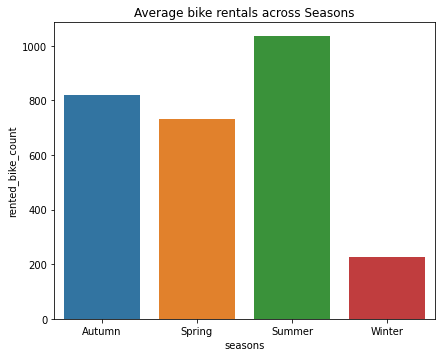

In [ ]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_season = bike_df.groupby(['seasons'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_season, x='seasons', y='rented_bike_count', ax=axes)
ax.set(xlabel='seasons', ylabel='rented_bike_count', title='Average bike rentals across Seasons')

####Checking for outliers on Season column

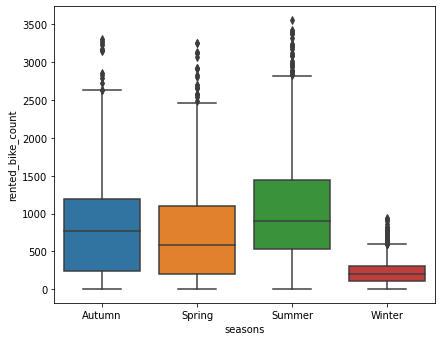

In [ ]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='seasons')

#### <b>Rented Bike Count vs Functioning Day (Bivariavate categorical data)
</b>

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'functioning_day'),
 Text(0.5, 1.0, 'Average bike rentals across Functioning Day')]

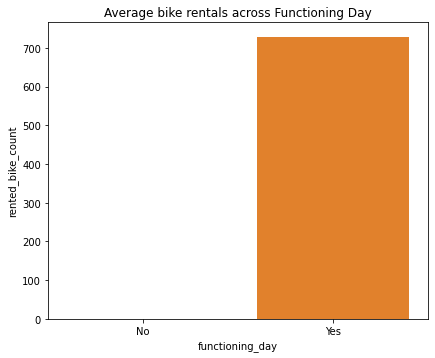

In [ ]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_workingday = bike_df.groupby(['functioning_day'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_workingday, x='functioning_day', y='rented_bike_count')
ax.set(xlabel='functioning_day', ylabel='rented_bike_count', title='Average bike rentals across Functioning Day')

#### Checking for outliers on Functioning Day column

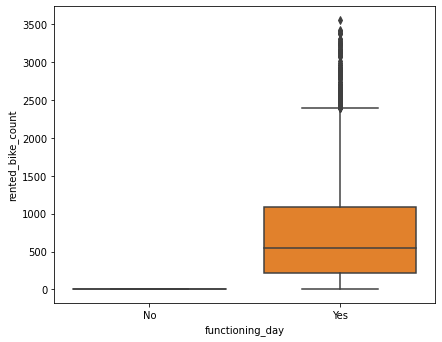

In [ ]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='functioning_day')

#### <b>Rented Bike Count vs Holiday (Bivariavate categorical data)
</b>

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'holiday'),
 Text(0.5, 1.0, 'Average bike rentals across Holiday')]

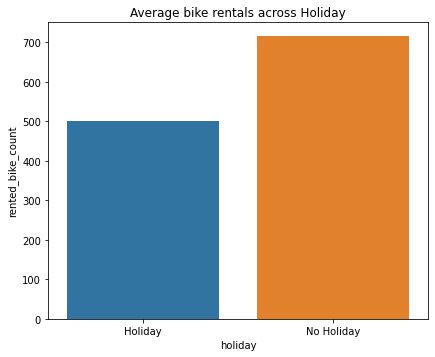

In [ ]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_holiday = bike_df.groupby(['holiday'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_holiday, x='holiday', y='rented_bike_count')
ax.set(xlabel='holiday', ylabel= 'rented_bike_count', title='Average bike rentals across Holiday')

#### Checking for outliers on Holiday Column

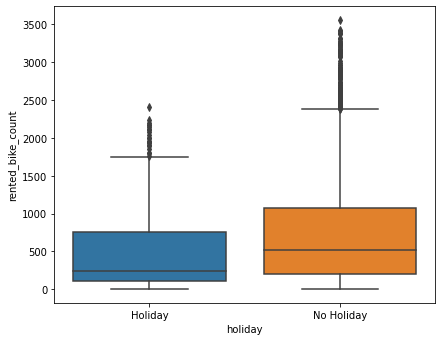

In [ ]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='holiday')

<b>Few Observations :-

* Bike reservations are lesser in Spring season compared to Summer and Fall
Lots of outlier points for a particular seasons. This is most likely due to variable distribution across the day.
* Bike sharing demand is high when there is a working day which might be because a lot of customer use these bikes to travel offices. No demand for rentak bikes when it is not a working day.
* Bike sharing demand is high on a No holiday condition compared to demand on a holiday which again proofs that people prefer to rent bike for professional purpose.

#### <b>Rented Bike Count Vs Temperature

In [ ]:
temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

Text(0.5, 1.0, 'Average rented bike count wrt temperature')

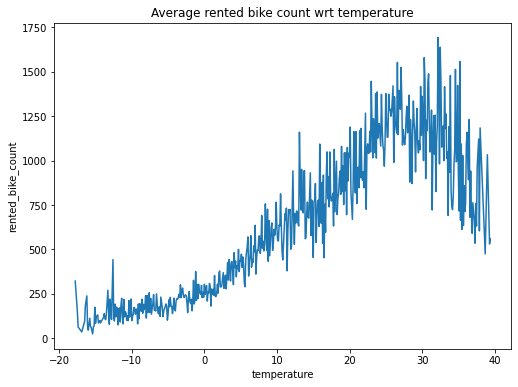

In [ ]:
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
ax = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count)
ax.set_title('Average rented bike count wrt temperature')

Observation

From the above line plot, we can see that there is a steady increase in the average bikes rented with temperature with a small decrease at the highest temperature.

#### <b> Chart - 6 - Hourly Rented Bike Counts (Univariate Categorical Data)

[Text(0.5, 1.0, 'Hourly Count based on Holiday or not')]

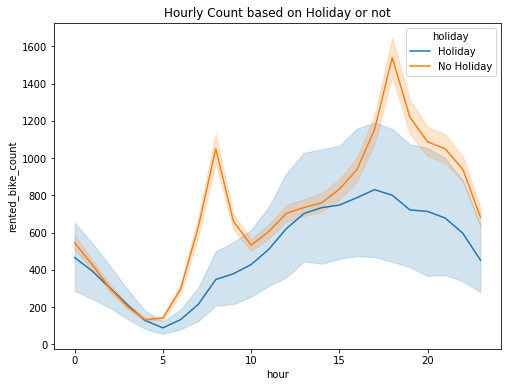

In [ ]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=bike_df, y='rented_bike_count', x='hour', ax=axes, hue= 'holiday')
axes.set(title='Hourly Count based on Holiday or not')

#### Hourly distribution vs rented bike count over weekends

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'Hour in the day'),
 Text(0.5, 1.0, 'Average Bike Rentals by the day across Weekdays and Weekends')]

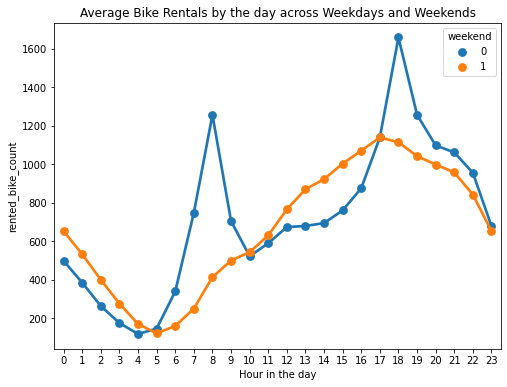

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(8, 6))
group_day_hour = bike_df.groupby(['weekend', 'hour'])['rented_bike_count'].mean().reset_index()
ax =sns.pointplot(data=group_day_hour, x='hour', y='rented_bike_count', hue='weekend')
ax.set(xlabel='Hour in the day', ylabel='rented_bike_count', title='Average Bike Rentals by the day across Weekdays and Weekends')

#### <b>Few Observation

<b>Monthly Distribution

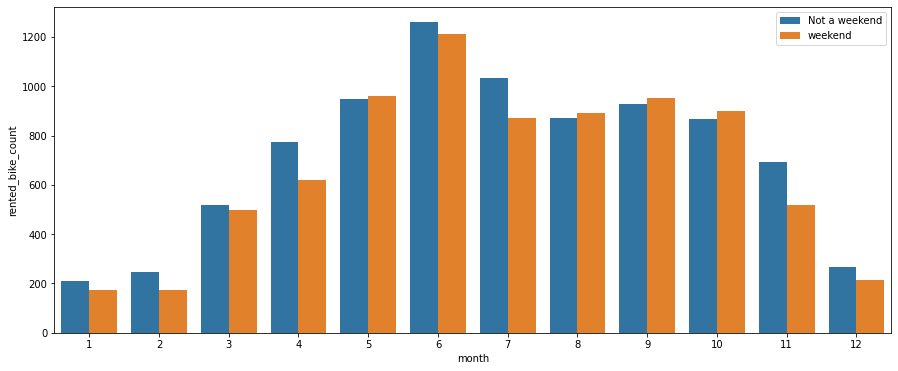

In [ ]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = bike_df.groupby(['month', 'weekend'])['rented_bike_count'].mean().reset_index()
sns.barplot(data=group_month, x='month', y='rented_bike_count', hue='weekend')
ax.set(xlabel='Month', ylabel='rented_bike_count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a weekend', 'weekend'])
plt.show()

Observations

* Lesser number of outliers can be seen in the seaborn box plot across hours indicating that most of the outliers are due to highly varying distribution during the day.
*Higher reservations can be seen at around 8am and 5pm (office hours) and close to 0 reservations very early in the morning
*From the above plot we can see the 2 patterns across the hours in a day in bike rentals
* Working Day: First pattern where there is a peak in the rentals at around 8am and another at around 5pm. These correspond to working local bikers who typically are registered and go to work on working day which are Monday to Friday
*Non Working Day: Second pattern where there is more or less a uniform rentals across the day with a peak at around noon time. These correspond to probably tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city of Washington on non working days which typically are Saturday and Sunday
*Also, we can see that we have more bike rentals during the Fall (July to September) and Summer (April to June) Season.

<b> Holiday: Rented bike count Vs Hour with Temperature (Multivariate Analysis)

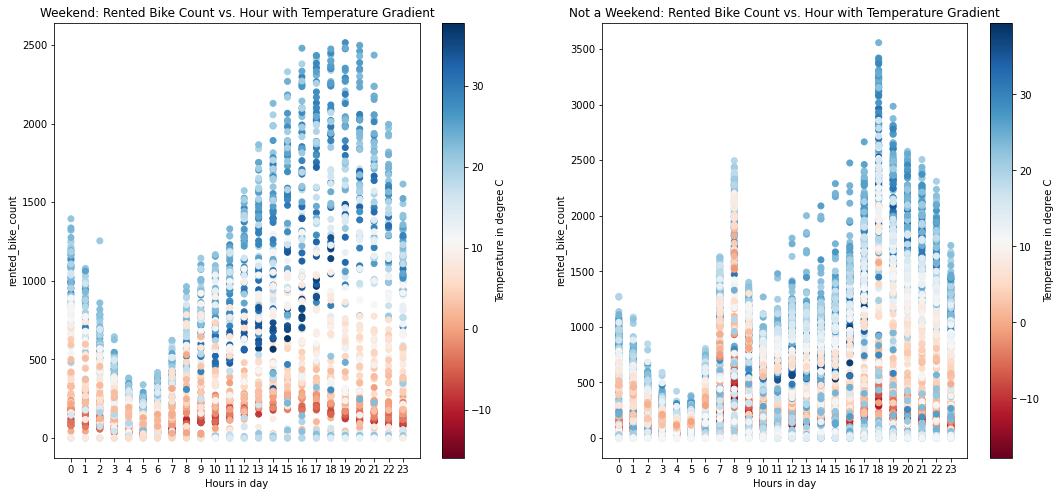

In [ ]:
bike_df_w = bike_df[bike_df.weekend==1]
bike_df_nw = bike_df[bike_df.weekend==0]

fig = plt.figure(figsize=(18, 8))
# Weekend
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(bike_df_w.hour, bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count', title='Weekend: Rented Bike Count vs. Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# Not a Weekend
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(bike_df_nw.hour, bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count', title='Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

plt.show()

From the above, we can see that in general, more people tend to prefer biking at moderate to high temperatures; however, if the temperature is too hot (darkest of the blue dots), there is a small decline in count.


rented bike count vs humidity

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'humidity'),
 Text(0.5, 1.0, 'Average bike rentals Vs Humidity')]

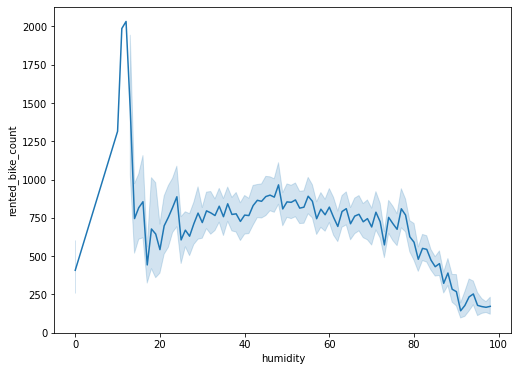

In [ ]:
# Rented Bike count vs Humidity
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_humidity = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=bike_df, x='humidity', y='rented_bike_count')
ax.set(xlabel='humidity', ylabel='rented_bike_count', title='Average bike rentals Vs Humidity')


Rented Bike Count Vs Wind Speed

[Text(0.5, 17.200000000000003, 'wind_speed'),
 Text(0.5, 1.0, 'Average bike rentals Vs wind_speed')]

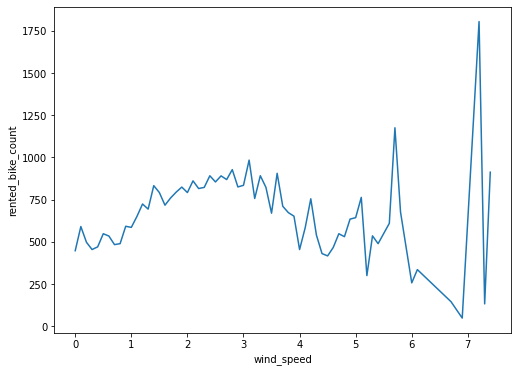

In [ ]:
# Rented Bike count vs Wind Speed
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count')
ax.set(xlabel='wind_speed', title='Average bike rentals Vs wind_speed')

Rented Bike Count Vs Visibility

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'visibility'),
 Text(0.5, 1.0, 'Average bike rentals Vs visibility')]

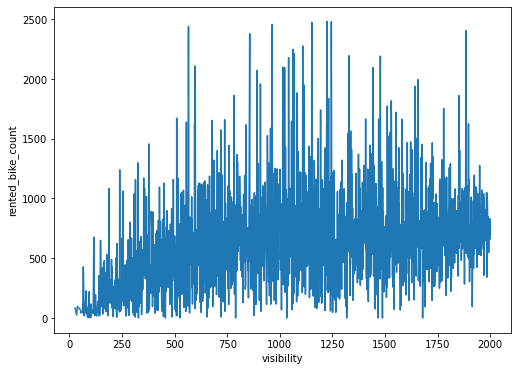

Rented Bike Count vs Dew Point Temperature

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'dew_point_temperature'),
 Text(0.5, 1.0, 'Average bike rentals Vs dew_point_temperature')]

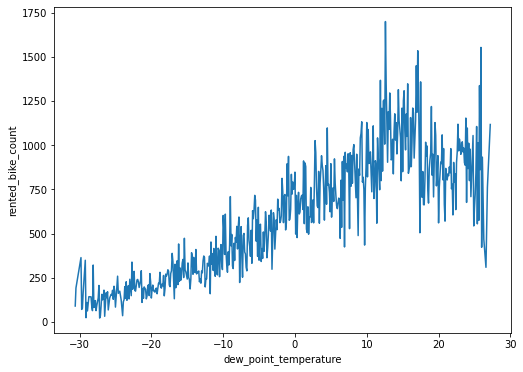

In [ ]:
# Rented Bike count vs dew_point_temperature
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count')
ax.set(xlabel='dew_point_temperature', ylabel='rented_bike_count', title='Average bike rentals Vs dew_point_temperature')

Rented Bike Count vs Solar Radiation

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'solar_radiation'),
 Text(0.5, 1.0, 'Average bike rentals Vs solar_radiation')]

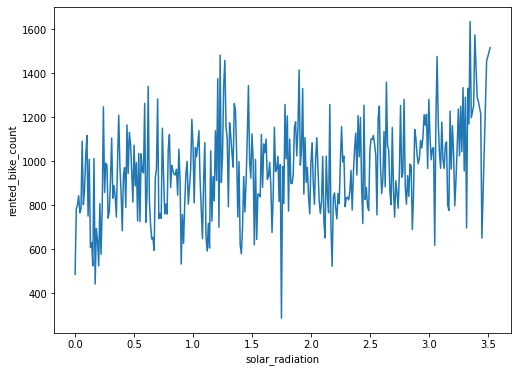

In [ ]:
# Rented Bike count vs solar_radiation
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_solar_radiation = bike_df.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count')
ax.set(xlabel='solar_radiation', ylabel='rented_bike_count', title='Average bike rentals Vs solar_radiation')

Rented Bike Count vs Rainfall

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'rainfall'),
 Text(0.5, 1.0, 'Average bike rentals Vs rainfall')]

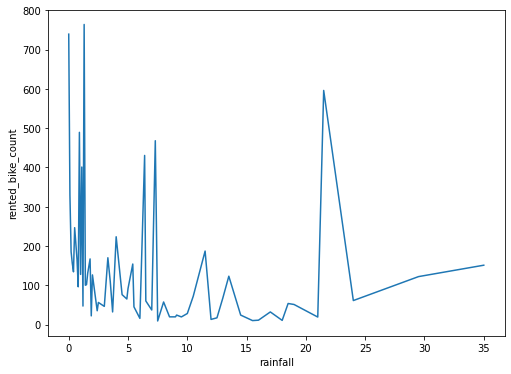

In [ ]:
# Rented Bike count vs rainfall
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count')
ax.set(xlabel='rainfall', ylabel='rented_bike_count', title='Average bike rentals Vs rainfall')

Rented Bike Count vs Snowfall

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'snowfall'),
 Text(0.5, 1.0, 'Average bike rentals Vs snowfall')]

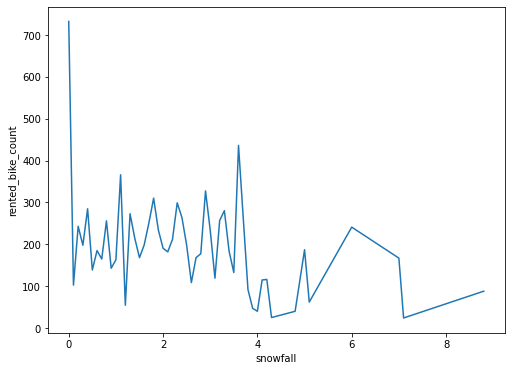

In [ ]:
# Rented Bike count vs snowfall
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count')
ax.set(xlabel='snowfall', ylabel='rented_bike_count', title='Average bike rentals Vs snowfall')

## **6. Outlier Analysis**

#### <b> Zscore > 4 Pruning </b>
Let us first take a look at the data entries with zscore > 4, i.e., data with more than 4 standard deviation away from the mean.

In [64]:
 # Function to calculate zscore
def zscore(series): 
    return (series-series.mean())/series.std()

bike_df['count_zscore'] = bike_df.groupby(['hour', 'functioning_day'])['rented_bike_count'].transform(zscore)
outlier_idx = np.abs(bike_df['count_zscore'])>4
outlier_data = bike_df.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (1, 16)


,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend,count_zscore
4922,1254,2,20.9,87,1.8,222,18.6,0.0,0.0,0.0,Summer,No Holiday,Yes,6,1,4.577229


Let us prune out this outliers. This could be due to some late night shows or holiday or some party.

In [67]:
# Removing outliers from mydata
bike_df_without_outliers = bike_df.loc[~outlier_idx, :]
print('Shape of data before outliner pruning: ', bike_df.shape)
print('Shape of data after outlier pruning: ', bike_df_without_outliers.shape)

Shape of data before outliner pruning:  (8759, 16)
Shape of data after outlier pruning:  (8759, 16)


Dropping the zscore column from the data frame

In [68]:
# Dropping the zscore column
bike_df_without_outliers = bike_df_without_outliers.drop('count_zscore', axis=1)
bike_df_without_outliers.head(n=3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


#### <b> Correlation Analysis </b>
Regression Plots
* Using seaborn to get regression plots with respect to some features

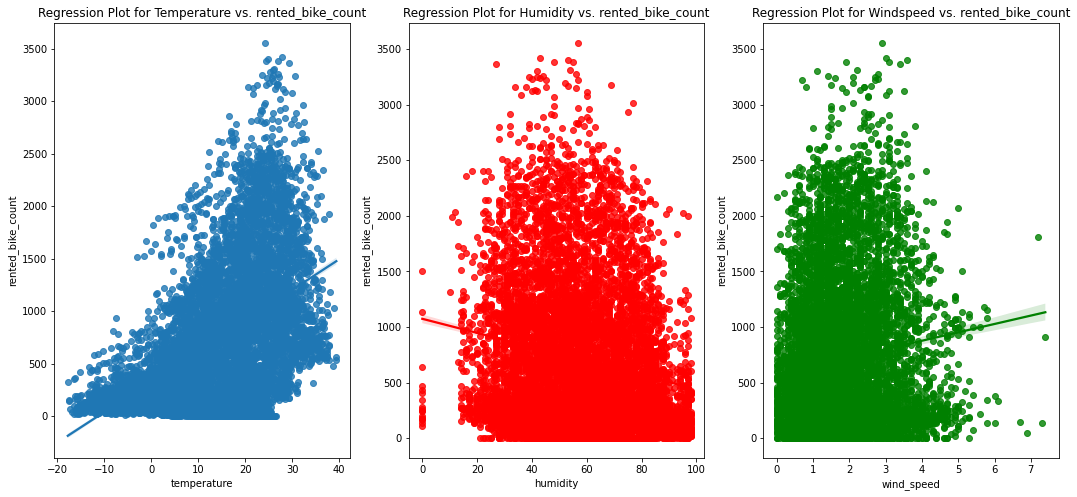

In [72]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data =bike_df_without_outliers, x='temperature', y='rented_bike_count',ax=axes)
axes.set(title='Regression Plot for Temperature vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=bike_df_without_outliers, x='humidity', y='rented_bike_count',ax=axes, color='r')
axes.set(title='Regression Plot for Humidity vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=bike_df_without_outliers, x='wind_speed', y='rented_bike_count',ax=axes, color='g')
axes.set(title='Regression Plot for Windspeed vs. rented_bike_count')
plt.show()

#### Observations

The above regplot indicates a positive correlation of count with temperature and windspeed and a negative correlation with humidity

#### <b> Heatmap Plot </b>
Using heatmap plots of all the numerical features to obtain correlation of the bike rental with other numerical features

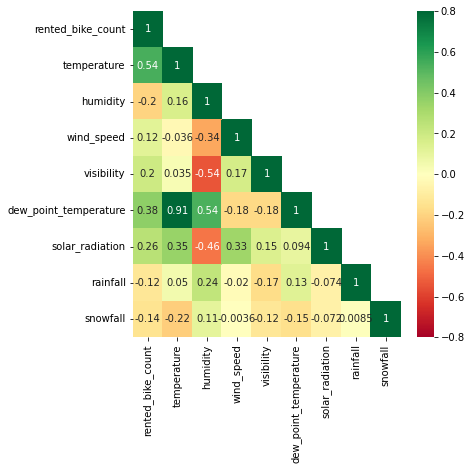

In [77]:
# Heatmap relative to all numeric columns
corr_matrix = bike_df_without_outliers.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

#### Inferences from the above heatmap

* <b> Very Highly Correlated (0.7 - 0.9) : </b> temperature and dew_point_temperature are very highly correlated as expected.

* <b> Moderately Correlated (0.5 - 0.7) : </b> We see a moderate correlation between humidity and dew_point_temperature and temperature and rented _bike_count. This is probably only true for the range of temperatures provided.
* <b> Negative Correlation (less than 0) :</b> We see a negative correlation between visibility and humidity and solar_radiation and humidity. The more the humidity, the less people prefer to bike.
* <b> Low Correlation(near zero):</b> rented_bike_count has a weak dependence on windspeed, snowfall, and rainfall.

## **7. Feature Engineering**

We have lots of categorical columns. We will transform each relevant and important categorical columns into binary vector columns. Later drop all the columns that are not required (redundant or very low correlation).

#### Summary of the column transformations

* season: month column has a direct mapping with season (Winter: January to March, Summer: April to June, Autumn: July to September and Spring: October to December). Hence we will drop season column.
* holiday and 'day': functioning_day = weekday and not a holiday. Since we noticed that there were two kinds of bike rental behavoirs - during functioning days and not a functioning day, we will retain only the workingday column and drop 'day' and 'holiday' column
* functioning_day: After observing the bike rental trend, we propose to build 2 separate models for 1. if it is a functioning day, and 2. if it is not a functioning day. Hence, we can separate out the data based on this column and drop the column.
* temperature: temperature and dew_point_temperature are highly correlated. Hence retain only the temperature column.
* windspeed, rainfall, snowfall: Very poorly correlated with count. Hence drop this column
* Date: Intuitively, there is should be no dependency on date. Hence drop this column
* hour: Split hour column to hour_0, hour_1, ..., hour_23. Drop hour_23 since it is a function of the rest of the hour columns.
* month: Split month column to month_1, month_2, ..., month_12. Drop month_12 since it is a function of the rest of the month columns

In [ ]:
# Mapping numbers to understandable text
bike_df['Seasons'] = bike_df['Seasons'].replace(['Spring','Summer','Autumn','Winter'], [1,2,3,4])
bike_df['Holiday'] = bike_df['Holiday'].replace(['No Holiday','Holiday'], [0,1])
bike_df['Functioning Day'] = bike_df['Functioning Day'].replace(['No','Yes'],[0,1])
bike_df.head(3)

KeyError: ignored

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

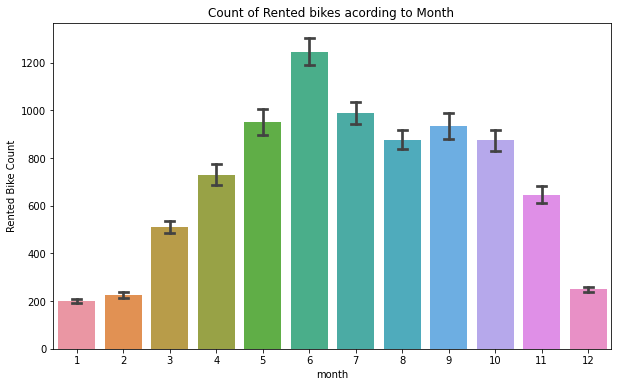

In [ ]:
#data vizualisation for coulmn month with respect to our dependent variable "Rented Bike Count"
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bike_df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

##### 1. Why did you pick the specific chart?

When presenting information in segments, bar charts should be used. Different categorical can be compared using vertical bar charts. provided that there aren't too many categories to compare. Time series data also greatly benefits from their use. So, I used bar chart to compare rented bike count with respect to month. I am comparing bike sharing demand in 12 different months to understand the demand of bike sharing.

##### 2. What is/are the insight(s) found from the chart?

* The above bar plot demonstrates that, in comparison to other months, demand for rented bikes is higher during the summer from May to October which is months number 5 to 10.
* Most demands are form the month of June which is month number 6.
* This might be because people wanted to 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A method of renting bikes in which the entire city's membership, rental, and bike return procedures are automated are known as bike sharing systems. People can rent bikes from one location and return them to another as needed through these systems.

When we compare the number of bike rentals by month, we notice that June has the most, followed by July. This suggests that bike riders would rather ride in warmer, more pleasant climates than in colder ones.

#### Chart - 2 - Rented Bike Count Vs. weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes wrt weekdays and weekend')]

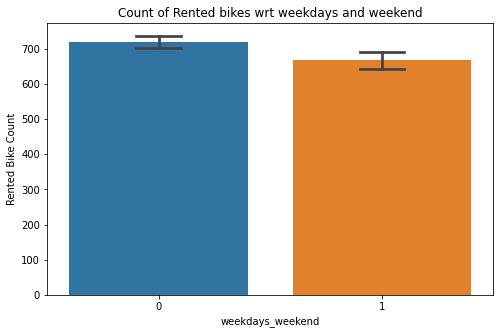

In [ ]:
# Chart - 2 visualization code
# Showing Rented Bike Counts vs weekend and weekdays

# data vizualisation
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes wrt weekdays and weekend')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average bike rented with respect to weekends, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From above graph we can say that on Sundays people prefer to travel more than Mondays. Sunday is represented here by o and Monday is by 1. This is why Bike rented count is more on sundays than mondays

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Store can manage to access more bikes available for rent to increase the revenue as demand is on the higher side. Morever they also can start charging a small amount of premium for some extra addition.

#### Chart - 3 - Hourly Rented Bike Counts (Univariate Categorical Data)